# Example: In-training validation
---------------------------------

This example shows how to keep track of the model's performance during training.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Initialize atom
atom = ATOMClassifier(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Memory: 138.96 kB
Scaled: False
Outlier values: 167 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   212 (1.0) |   170 (1.0) |    42 (1.0) |
| 1 |   357 (1.7) |   286 (1.7) |    71 (1.7) |



In [4]:
# Not all models support in-training validation
# You can chek which ones do using the available_models method
df = atom.available_models()[["acronym", "model", "has_validation"]]
df[df["has_validation"]]

acronym                      model  has_validation
3     CatB                   CatBoost            True
15     LGB                   LightGBM            True
19     MLP       MultiLayerPerceptron            True
21      PA          PassiveAggressive            True
22    Perc                 Perceptron            True
27     SGD  StochasticGradientDescent            True
29     XGB                    XGBoost            True

In [5]:
# Run the models normally
atom.run(models=["MLP", "LGB"], metric="auc")


Training ========================= >>
Models: MLP, LGB
Metric: roc_auc


Results for MultiLayerPerceptron:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.9997
Test evaluation --> roc_auc: 0.9936
Time elapsed: 1.673s
-------------------------------------------------
Total time: 1.673s


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 1.0
Test evaluation --> roc_auc: 0.9775
Time elapsed: 0.309s
-------------------------------------------------
Total time: 0.309s


Final results ==================== >>
Total time: 1.982s
-------------------------------------
MultiLayerPerceptron --> roc_auc: 0.9936 !
LightGBM             --> roc_auc: 0.9775


## Analyze the results

In [6]:
atom.plot_evals(title="In-training validation scores")

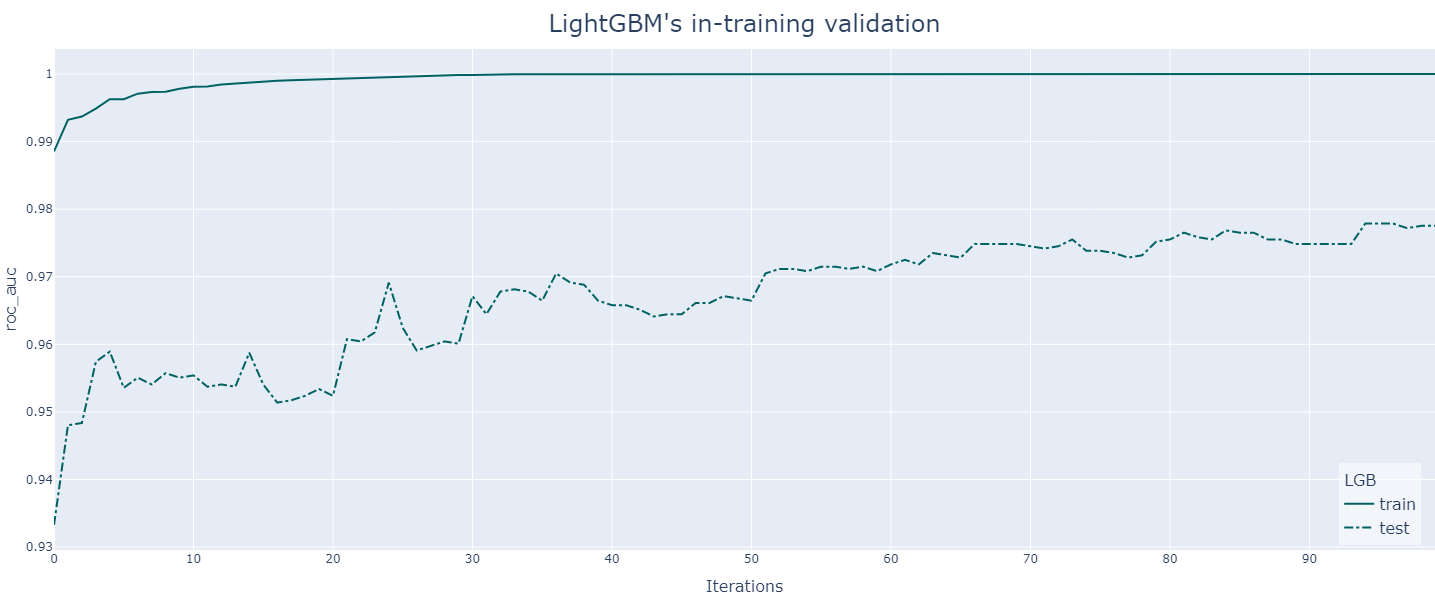

In [8]:
# Plot the validation on the train and test set
atom.lgb.plot_evals(dataset="train+test", title="LightGBM's in-training validation")